In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
image = cv2.imread("images/1.1.jpg")

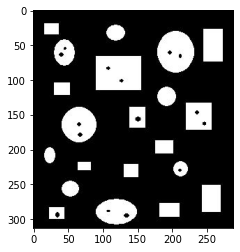

In [3]:
# display original image
plt.imshow(image)
plt.show()


In [4]:
# make a copy from image
image_circles = image.copy()
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detecting edges with canny operator
edges = cv2.Canny(gray, threshold1=80, threshold2=100)

In [5]:
gray_blurred = cv2.blur(gray, (3, 3))

In [6]:
# Apply Hough transform
d_c = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20, param1 = 100, param2 = 40, minRadius = 5, maxRadius = 0)

In [7]:
if d_c is not None:
    d_c = np.uint16(np.around(d_c))
  
    for parameter in d_c[0, :]:
        a, b, r = parameter[0], parameter[1], parameter[2]
        cv2.circle(image_circles, (a, b), r, (0, 255, 0), 2)
        cv2.circle(image_circles, (a, b), 1, (255, 0, 255), 3)

In [8]:
#detect holes in images
holes = cv2.medianBlur(gray, 5)

In [9]:
d_h = cv2.HoughCircles(holes, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=4, minRadius=0, maxRadius=3)

In [15]:
# Draw holes 
if d_h is not None:
    d_h = np.uint16(np.around(d_h))
    hole_number = 0
    for parameter in d_h[0, :]:
        a, b, r = parameter[0], parameter[1], parameter[2]
        cv2.circle(image_circles, (a, b), 1, (255, 0, 0), 3)
        hole_number = hole_number + 1

print(f'Hole Number : {hole_number}' )

Hole Number : 10


In [13]:
# calculating the area of 
if d_c is not None:
    d_c = np.uint16(np.around(d_c))
    for parameter in d_c[0, :]:
        a, b, r = parameter[0], parameter[1], parameter[2]
        print(f'AREA: {r * r * math.pi }')

AREA: 1963.4954084936207
AREA: 615.7521601035994
AREA: 380.132711084365


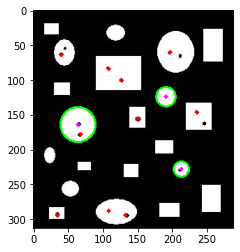

In [12]:
# dispaly images
plt.imshow(image_circles)
plt.show()